In [1]:
#Runs a Crank Nicolson Scheme for a gaussian laser pulse propagating
#in a plasma channel and computes the result for one coordinate
#using the wave equation defined by "Tunable polarization plasma channel
#undulator for narrow bandwidth photon emission" Rykovanov et. al.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Call modules
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import sys
#import Image
#import glob

In [3]:
#Sets path for saving data and number of significant
#figures stored in variables
sys.path.append("/home/data")
np.set_printoptions(precision=15)

In [4]:
#Define x where L is half the length of the channel, NSteps_x is the number
#of steps the channel is divided into, and dx is the constant distance
#between steps in the x direction used in finite difference method.
#x_grid is the vector used to store the width of the space.

L = 10.
#J = 1000
NSteps_x=1000
#dx = float(L)/float(J-1)
#x_grid = np.array([j*dx for j in range(J)])

x_grid = linspace(-L, L, NSteps_x)
dx=x_grid[1]-x_grid[0]

#print x_grid.shape

In [5]:
#Define t where T is the full period of the simulation, NSteps_t is the
#number of divisions of the temporal variable, and dt is the separation of
#time steps used in finite difference method. t_grid is the vector that
#stores the temporal domain.

T = 1.
NSteps_t = 1000
#dt = float(T)/float(N-1)
#t_grid = np.array([n*dt for n in range(N)])

t_grid = linspace(0, T, NSteps_t)
dt=t_grid[1]-t_grid[0]

In [6]:
#Define parameters according to "Tunable polarization plasma channel
#undulator for narrow bandwidth photon emission" Rykovanov et. al. From these parameters,
#the density of the plasma is determined and stored in the inline function
#pot. thetax is the insertion angle of the pulse into the channel.

#i=1j
#Mp is the ratio of laser to plasma wave numbers
Mp=33.
#n0 is the on-axis plasma density.
n0=1.0e18
#e is the fundamental electron charge
e=4.8e-10
#me is the electron mass
me=9.11e-28
#c is the speed of light
c=3e8
#kp is the plasma frequency
kp=((4.*pi*(e**2.)*n0)/(me*c**2.))**0.5
#rm
rm=7*2*pi/Mp
#rcl
rcl=e**2/(me*c**2)
#Dn
Dn=kp**2/((rm**2)*rcl*pi)
#R
R=pow(rm,2)/2
#Omega
Omega=pow(Mp*R,-1)




#Dn is the channel depth
#Dn=6.74**28
#Dn=2.1**17
#kp is the plasma wave number
#kp=np.sqrt((4*np.pi*pow(pow(1.602,-19),2)*n0)/(pow(9.109,-31)*pow(299792458,2)))
#kp=3.2561**8
#kl is the wave number of the laser
#kl=Mp*kp
#rcl is the classical electron radius
#rcl=pow(pow(1.602,-19),2)/(pow(9.109,-31)*pow(299792458,2))
#rcl=2.8179**-13
#rm is the matched laser spotsize
#rm=kp/np.sqrt(np.pi*rcl*Dn)
#rm=1.33279688334
#R is the dimensionless channel radius
#R=pow(rm,2)/2
#Omega is the eigenfrequency of potential oscillation
#Omega=pow(Mp*R,-1)
a0=1.
w0=1.5*rm
thetax=0.
x0=0.

#sigma is composed of the constants present in the differential equation
#which describes propagation in the plasma channel. 
sigma=1j*dt/(8*Mp*pow(dx,2))

#V is the full potential term of the Schroedinger's equation used to propagate
#the laser pulse in the plasma channel.

V=(Mp/4)*((1/pow(Mp,2))+(pow(x_grid,2)*pow(Omega,2)))
#V[970:1000]=0.03
#V[0:30]=0.03

#a is introduced as the laser's vector potential which the differential equation
#acts on.

pot=lambda j: (1j*Mp/4*dt)*((1/pow(Mp,2))+(pow(j*dx-x0,2)*pow(Omega,2)))

#pot_vec=lambda x_grid, a: np.multiply(1j, Mp, 0.5, dt, np.add(np.multiply(1,pow(pow(Mp,2),-1)),np.multiply(pow(x_grid,2),pow(Omega,2))),a) 
            

print rm*33/(2*pi)


7.0


In [7]:
#Specify initial conditions of the laser's vector potential. The pulse function
#is taken from "Tunable polarization plasma channel
#undulator for narrow bandwidth photon emission" Rykovanov et. al.
#as a guassian pulse with an oscillatory
#term that yeilds oscillation for some input angle.



no_high=10


def afunc(x_grid):
    #print thetax
    return a0*np.exp(-((x_grid-x0)**2)/w0**2+1j*Mp*thetax*x_grid)

#a=numpy.array([a0*numpy.exp(pow(t_grid,2))*numpy.sin(Mp*kp*x_grid)])

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


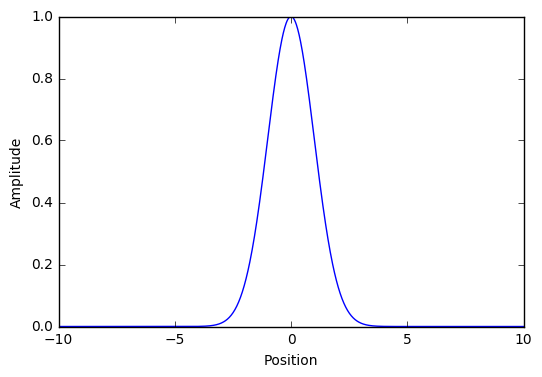

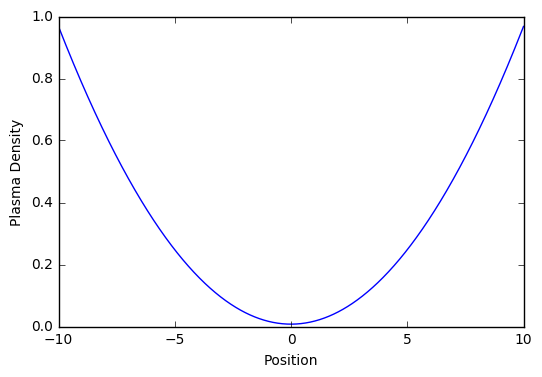

In [8]:
#Plots the initial field's intensity and potential
#for visual representation.

a = np.array([afunc(X) for X in x_grid])

#pottest=pot(x_grid,a)
#pottest.shape()

a[0]=0.
#a[1]=0.
#a[NSteps_t-2]=0.
a[-1]=0.

ylim=((0., 1))
plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.plot(x_grid,a*a.conjugate())
plt.show()

ylim=((0., 1))
plt.xlabel('Position')
plt.ylabel('Plasma Density')
plt.plot(x_grid,V)
plt.show()

In [9]:
#Define matrices for the Crank-Nicolson scheme. These are defined by finite
#difference method for x and t where A acts on the field at the next time step
#and B acts on the field in the previous timestep. These matrices are tridiagonal
#for problems in 1D.

A=np.diagflat([-sigma for m in range(NSteps_x-1)],-1) +\
np.diagflat([1.+3.*sigma+pot(m)]+[1.+2.*sigma+pot(m) for m in range(NSteps_x-2)]+[1.+3.*sigma+pot(m)]) +\
np.diagflat([-sigma for m in range(NSteps_x-1)], 1)

B=np.diagflat([sigma for m in range(NSteps_x-1)], -1) +\
np.diagflat([1.-2.*sigma-pot(m)]+[1.-2.*sigma-pot(m) for m in range(NSteps_x-2)]+[1.-2.*sigma-pot(m)]) +\
np.diagflat([sigma for m in range (NSteps_x-1)], 1)

B[0][-1]=sigma
B[-1][0]=sigma

#Checks to see if A and B are invertible. This is required for the solving scheme
#and the matrices may not be invertible for particular sets of initial conditons.

#Aisinv=np.linalg.inv(A)
#Bisinv=np.linalg.inv(B)

#For periodic boundaries, the dependence of the function at the grid's endpoints
#requires terms that make the A and B matrices circulant rather than tridiagonal.
#To that end, I introduce the w and z vectors in order to solve this using the
#Sherman-Morrison algorithm.

w=zeros(NSteps_x)
w[0]=1.
w[NSteps_x-1]=1.

z=zeros(NSteps_x, dtype=np.complex_)
z[0]=-sigma
z[NSteps_x-1]=-sigma

wzt=np.outer(w,z)

#print B

In [10]:
#Contains a loop which advances the field in time with each iteration. 
#The previous field is a where the first field inserted into the channel.
#The next time step is calculated through a linear algebra solving function
#and stored in a_new which is recast as a and arranged into a vector through
#a_record.
a_record=[]

a_record.append(a)

plotnumber=1

intensity=zeros(NSteps_t)

energyval=zeros(NSteps_t)

#for ti in range(1,2):
    
    
#for ti, t in enumerate(t_grid[:100]):
for ti, t in enumerate(t_grid):
    #print a
    #a_new = np.linalg.solve(A+wzt,B.dot(a)+ pot(x_grid, a) )
    #a_new[0]=a_new[NSteps_t-1]
    #a_new[1]=a_new[NSteps_t-2]
    a_new = numpy.linalg.solve(A,B.dot(a))
    
    a = a_new
    #a[0]=0.
    #a[1]=0.
    #a[NSteps_t-2]=0.
    #a[NSteps_t-1]=0.
    a_record.append(a)
    
    #ylim=((0., 1))
    #plt.xlabel('Position'); pyplot.ylabel('Field')
    #plt.plot(x_grid,a)
    #plt.show()
    
    
    #Intensity, being the measurable quantity in optics, is calculated
    #and plotted here. The plots are saved so they can be converted into
    #a gif for visualization of the time advancement.
    
    intensity=a*a.conjugate()
    plt.xlabel('Position'); plt.ylabel('Intensity')
    #plt.plot(x_grid,a)
    plt.plot(x_grid,a*a.conjugate())
    fig1=plt.plot(x_grid,intensity)
    plt.ylim=([0,1])
    filename= 'cranknicktest-%06d.png' % ti
    savefig('/home/teter/data/periodic5/'+filename,dpi=100)
    plt.clf()
    plt.cla()
    plt.close()
    
    #In order to compare with the paper "Efficient Modeling of Laser-Plasma
    #Accelerators Using the Ponderomotive-Based Code INF&RNO" by C. Benedetti
    #et. al., the total intensity is saved in the array energyval.
    
    energyval[ti]=sum(intensity)
    
    #time.sleep(2)
    if ti % 5 == 0:
        
        if ti==0:
            data_a = intensity
        else:
            data_a = vstack([data_a, intensity])
        #ylim=((0., 1))
        #plt.xlabel('Position'); plt.ylabel('Field')
        #plt.plot(x_grid,a)
        #plt.plot(x_grid,a*a.conjugate())
        #plt.plot(x_grid,intensity)
        #plt.show()
        print plotnumber
        plotnumber=plotnumber+1
        
        

    #print a

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:60: ComplexWarning: Casting complex values to real discards the imaginary part


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


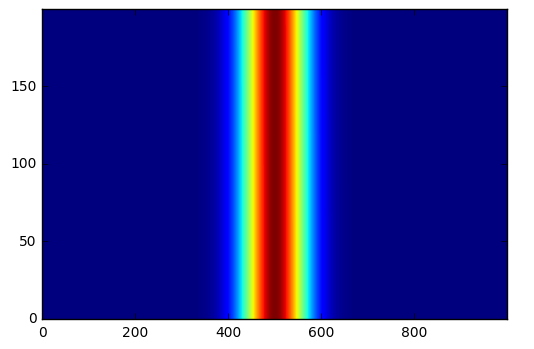

In [11]:
imshow(abs(data_a), aspect='auto', origin='lower')

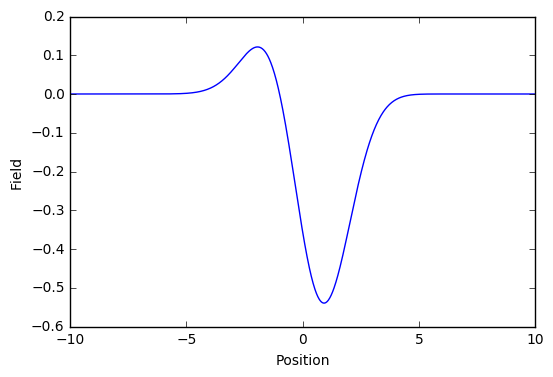

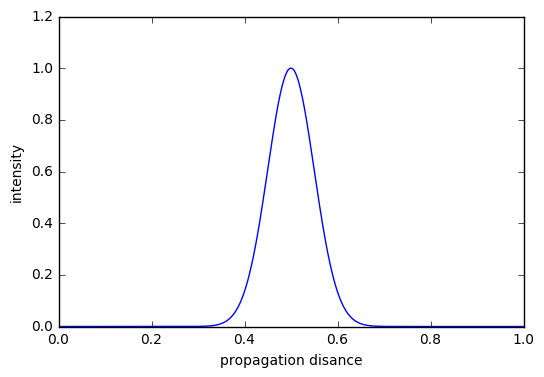

In [12]:
ylim=((0., 1))
plt.xlabel('Position'); plt.ylabel('Field')
plt.plot(x_grid,a)
plt.show()

ylim=((0., 1))
plt.xlabel('propagation disance'); plt.ylabel('intensity')
plt.plot(t_grid,intensity)
plt.show()



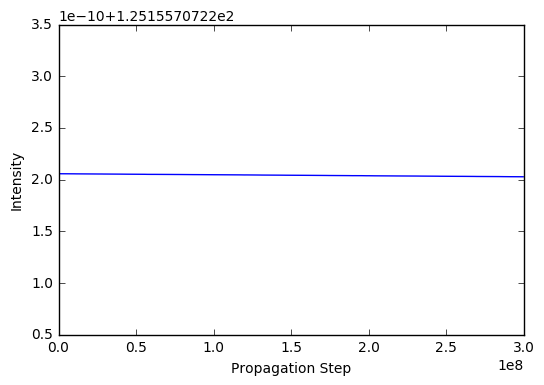

In [13]:
z_grid=299792458*t_grid
ylim=((0., 1))
plt.xlabel('Propagation Step')
plt.ylabel('Intensity')
plt.plot(z_grid,energyval)
plt.show()

NameError: name 'kl' is not defined